In [8]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_list = []
data_list.append(pd.read_csv("train/train.tsv", delimiter='\t', index_col=0))
df = pd.concat(data_list)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290506 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           290506 non-null  int64
 1   Aspect                              290506 non-null  int64
 2   Slope                               290506 non-null  int64
 3   Horizontal_Distance_To_Hydrology    290506 non-null  int64
 4   Vertical_Distance_To_Hydrology      290506 non-null  int64
 5   Horizontal_Distance_To_Roadways     290506 non-null  int64
 6   Hillshade_9am                       290506 non-null  int64
 7   Hillshade_Noon                      290506 non-null  int64
 8   Hillshade_3pm                       290506 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  290506 non-null  int64
 10  Wilderness_Area1                    290506 non-null  int64
 11  Wilderness_Area2                    290506 non-null  int6

In [9]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3189,202,28,518,-25,1723,194,251,175,3599,...,0,0,0,0,0,0,0,0,0,1
1,3220,14,4,90,5,5940,216,231,153,1153,...,0,0,0,0,0,0,0,0,0,1
3,3221,168,16,30,11,2577,231,244,139,2761,...,0,0,0,0,0,0,0,0,0,7
4,2967,308,14,201,42,1360,181,230,189,3164,...,0,0,0,0,0,0,0,0,0,1
6,3009,16,15,150,16,3650,206,208,137,5053,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581005,3018,135,9,794,132,5891,235,236,133,5496,...,0,0,0,0,0,0,0,0,0,2
581007,3070,8,2,120,3,5334,217,235,155,2536,...,0,0,0,0,0,0,0,0,0,1
581009,2735,14,24,60,26,2227,190,184,123,360,...,0,0,0,0,0,0,0,0,0,2
581010,2813,44,17,150,32,1396,222,201,109,1254,...,0,0,0,0,0,0,0,0,0,2


In [6]:
cover_type1 = df[df['Cover_Type'] == 1]
cover_type1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3189,202,28,518,-25,1723,194,251,175,3599,...,0,0,0,0,0,0,0,0,0,1
1,3220,14,4,90,5,5940,216,231,153,1153,...,0,0,0,0,0,0,0,0,0,1
4,2967,308,14,201,42,1360,181,230,189,3164,...,0,0,0,0,0,0,0,0,0,1
9,3273,69,8,108,5,5739,229,224,128,691,...,0,0,0,0,0,0,0,0,0,1
10,2939,64,16,60,23,4818,233,206,100,2462,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580998,2719,63,23,576,-51,3121,233,186,72,2655,...,0,0,0,0,0,0,0,0,0,1
580999,3338,287,13,212,46,2903,184,239,195,1041,...,0,0,0,0,0,0,0,0,0,1
581001,3233,358,16,960,216,2016,193,209,152,2268,...,0,0,0,0,0,0,0,0,0,1
581002,3109,335,12,60,15,1530,192,223,170,2403,...,0,0,0,0,0,0,0,0,0,1


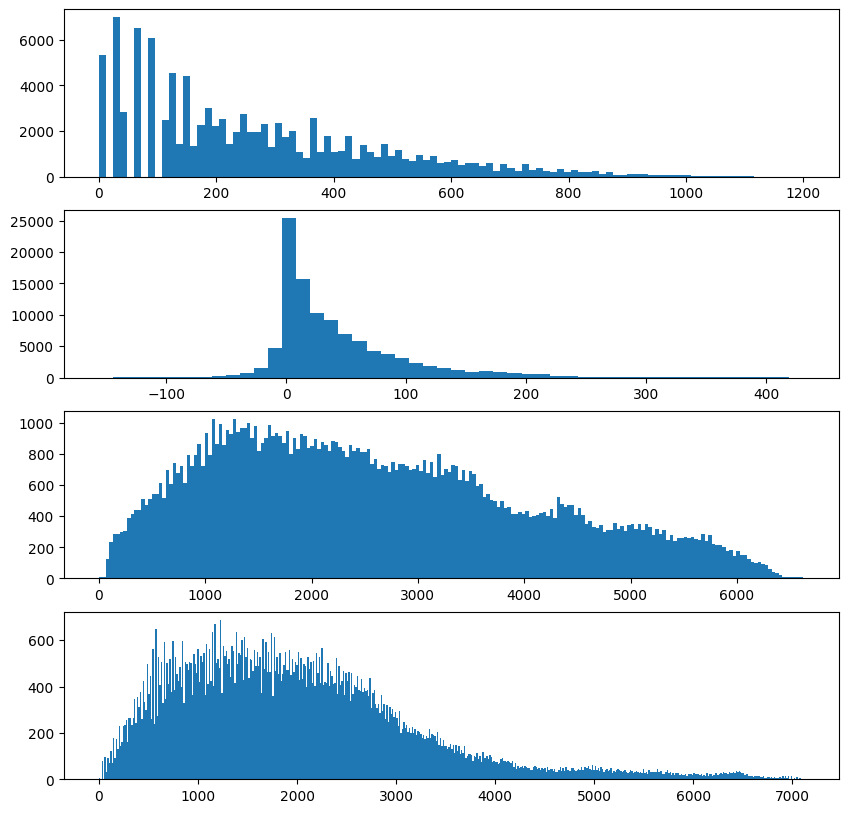

In [7]:
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
axes[0].hist(cover_type1["Horizontal_Distance_To_Hydrology"],bins=100)# 最も近い水面までの水平距離
axes[1].hist(cover_type1["Vertical_Distance_To_Hydrology"],bins=50)# 最も近い水面までの垂直距離
axes[2].hist(cover_type1["Horizontal_Distance_To_Roadways"],bins=200)# 最も近い道路までの水平距離
axes[3].hist(cover_type1["Horizontal_Distance_To_Fire_Points"],bins=500)# 最も近い森林火災点までの距離
plt.show()

In [10]:
cover_type2 = df[df['Cover_Type'] == 2]
cover_type2

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
6,3009,16,15,150,16,3650,206,208,137,5053,...,0,0,0,0,0,0,0,0,0,2
7,2971,242,15,323,122,1087,190,251,197,362,...,0,1,0,0,0,0,0,0,0,2
8,2797,116,14,277,67,3058,244,226,107,2694,...,0,0,0,0,0,0,0,0,0,2
15,2763,51,13,162,-7,306,226,211,117,940,...,0,0,0,0,0,0,0,0,0,2
16,2849,33,18,124,25,3788,214,198,114,2863,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580996,2788,315,15,150,38,2271,177,226,188,741,...,0,0,0,0,0,0,0,0,0,2
581005,3018,135,9,794,132,5891,235,236,133,5496,...,0,0,0,0,0,0,0,0,0,2
581009,2735,14,24,60,26,2227,190,184,123,360,...,0,0,0,0,0,0,0,0,0,2
581010,2813,44,17,150,32,1396,222,201,109,1254,...,0,0,0,0,0,0,0,0,0,2


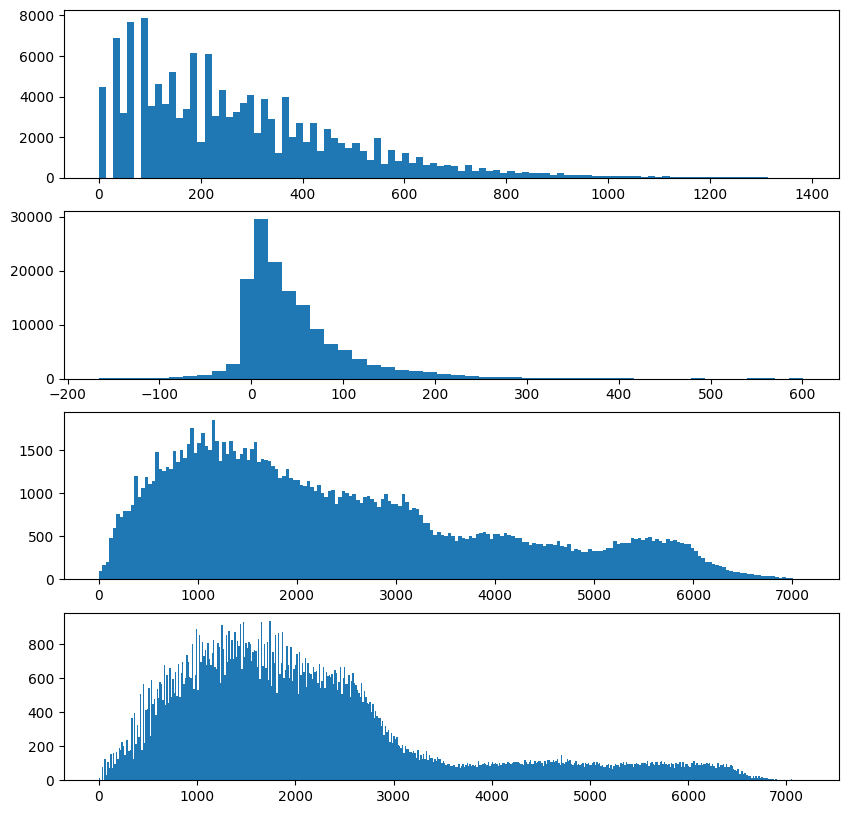

In [12]:
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
axes[0].hist(cover_type2["Horizontal_Distance_To_Hydrology"],bins=100)# 最も近い水面までの水平距離
axes[1].hist(cover_type2["Vertical_Distance_To_Hydrology"],bins=50)# 最も近い水面までの垂直距離
axes[2].hist(cover_type2["Horizontal_Distance_To_Roadways"],bins=200)# 最も近い道路までの水平距離
axes[3].hist(cover_type2["Horizontal_Distance_To_Fire_Points"],bins=500)# 最も近い森林火災点までの距離
plt.show()

In [13]:
cover_type3 = df[df['Cover_Type'] == 3]
cover_type3

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
28,2363,274,23,402,110,339,152,238,222,693,...,0,0,0,0,0,0,0,0,0,3
83,2456,88,21,124,6,696,246,200,73,446,...,0,0,0,0,0,0,0,0,0,3
94,2652,50,4,351,104,531,221,231,146,1332,...,0,0,0,0,0,0,0,0,0,3
132,2812,104,22,553,183,2620,251,206,72,1959,...,0,0,0,0,0,0,0,0,0,3
137,2619,134,16,402,107,738,243,231,112,1570,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580846,2449,109,20,60,0,771,250,213,82,268,...,0,0,0,0,0,0,0,0,0,3
580859,2255,15,23,42,12,658,193,185,122,582,...,0,0,0,0,0,0,0,0,0,3
580865,2514,78,20,120,24,1101,241,200,81,902,...,0,0,0,0,0,0,0,0,0,3
580963,2619,93,15,342,91,612,242,215,99,1572,...,0,0,0,0,0,0,0,0,0,3


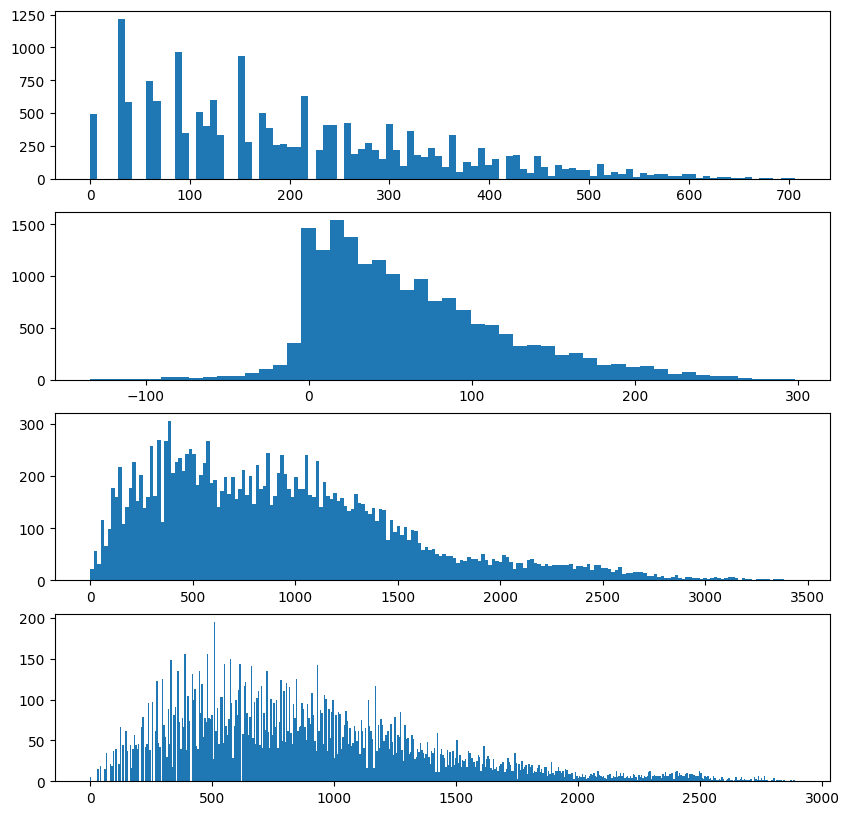

In [14]:
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
axes[0].hist(cover_type3["Horizontal_Distance_To_Hydrology"],bins=100)# 最も近い水面までの水平距離
axes[1].hist(cover_type3["Vertical_Distance_To_Hydrology"],bins=50)# 最も近い水面までの垂直距離
axes[2].hist(cover_type3["Horizontal_Distance_To_Roadways"],bins=200)# 最も近い道路までの水平距離
axes[3].hist(cover_type3["Horizontal_Distance_To_Fire_Points"],bins=500)# 最も近い森林火災点までの距離
plt.show()

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
438          2211     126     32                                42   
571          2272     122     31                               153   
1468         2351     108     24                               319   
1524         2303      49     19                               134   
1543         2354     126     22                               247   
...           ...     ...    ...                               ...   
579768       2188      72     12                                 0   
579826       2310     202     17                               402   
579913       2283     123     31                                85   
580017       2139     101     32                               108   
580754       2255     123     33                               124   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
438                                 28                             1315   
571      

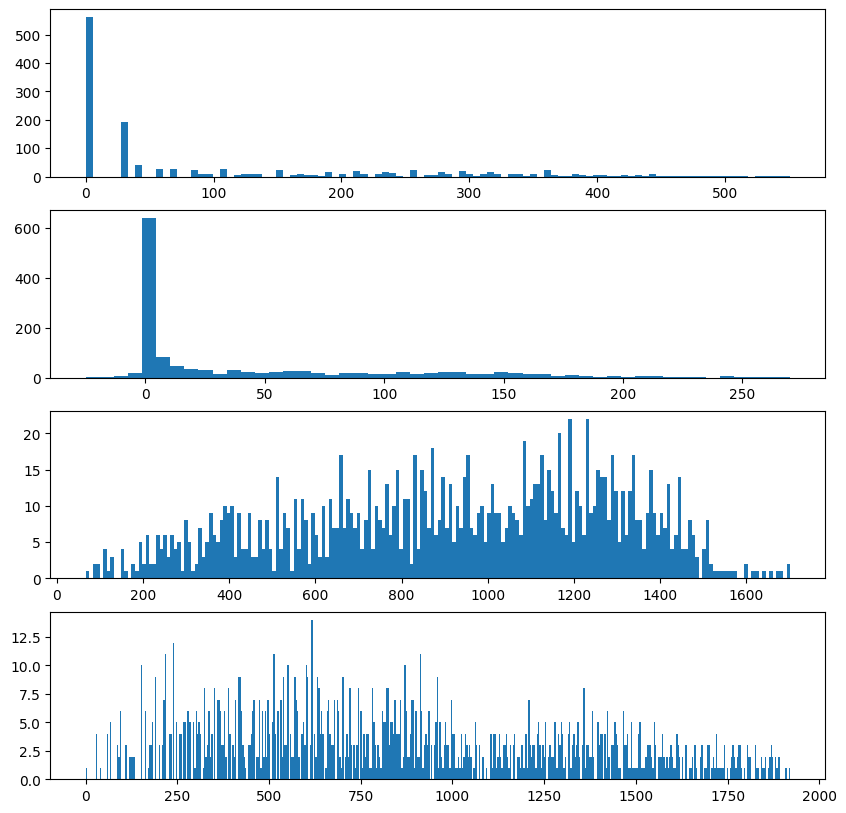

In [15]:
cover_type4 = df[df['Cover_Type'] == 4]
print(cover_type4)
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
axes[0].hist(cover_type4["Horizontal_Distance_To_Hydrology"],bins=100)# 最も近い水面までの水平距離
axes[1].hist(cover_type4["Vertical_Distance_To_Hydrology"],bins=50)# 最も近い水面までの垂直距離
axes[2].hist(cover_type4["Horizontal_Distance_To_Roadways"],bins=200)# 最も近い道路までの水平距離
axes[3].hist(cover_type4["Horizontal_Distance_To_Fire_Points"],bins=500)# 最も近い森林火災点までの距離
plt.show()

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
626          2599      54      4                               256   
926          2893     104      2                               180   
998          2837     124     14                               210   
1182         2629     191      9                                 0   
1298         2840     125     14                                85   
...           ...     ...    ...                               ...   
579954       2881     195     16                              1053   
580346       2829     205     24                               295   
580415       2917     274     10                                 0   
580547       2883     203     26                               474   
580819       2788     280     18                               242   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
626                                 72                              570   
926      

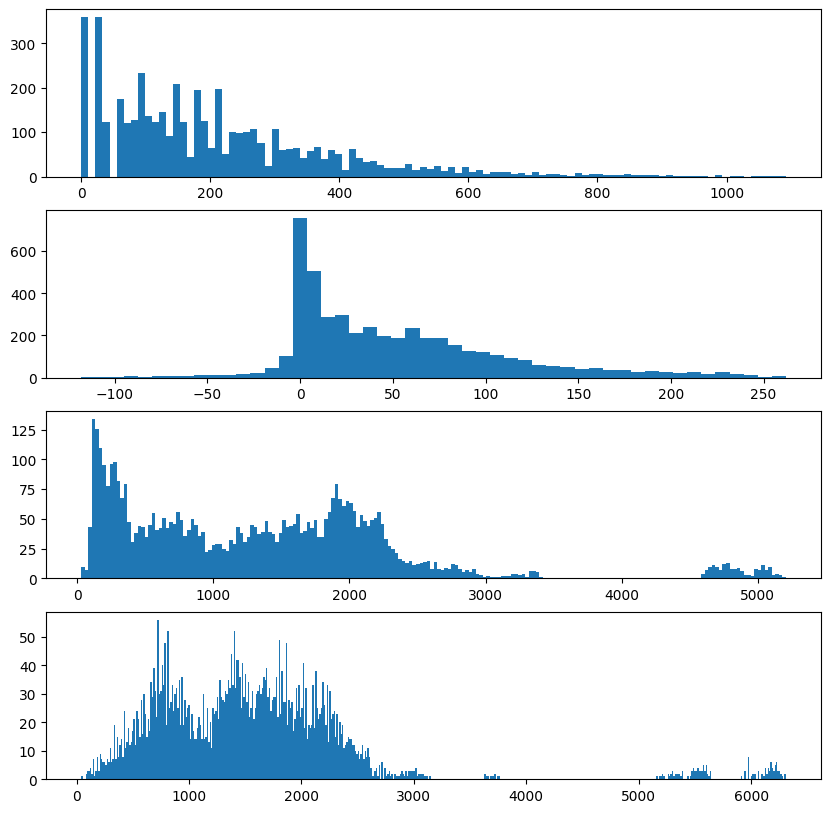

In [16]:
cover_type5 = df[df['Cover_Type'] == 5]
print(cover_type5)
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
axes[0].hist(cover_type5["Horizontal_Distance_To_Hydrology"],bins=100)# 最も近い水面までの水平距離
axes[1].hist(cover_type5["Vertical_Distance_To_Hydrology"],bins=50)# 最も近い水面までの垂直距離
axes[2].hist(cover_type5["Horizontal_Distance_To_Roadways"],bins=200)# 最も近い道路までの水平距離
axes[3].hist(cover_type5["Horizontal_Distance_To_Fire_Points"],bins=500)# 最も近い森林火災点までの距離
plt.show()

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
51           2626     342     22                               150   
102          2460      76     16                               446   
158          2492     340     21                               108   
227          2678      68     22                                95   
318          2401     319     10                               127   
...           ...     ...    ...                               ...   
580854       2728      18     13                               361   
580958       2269     258     20                                30   
580978       2505     172     13                                30   
581000       2512     312     18                                30   
581003       2465      56      7                                 0   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
51                                  32                             1597   
102      

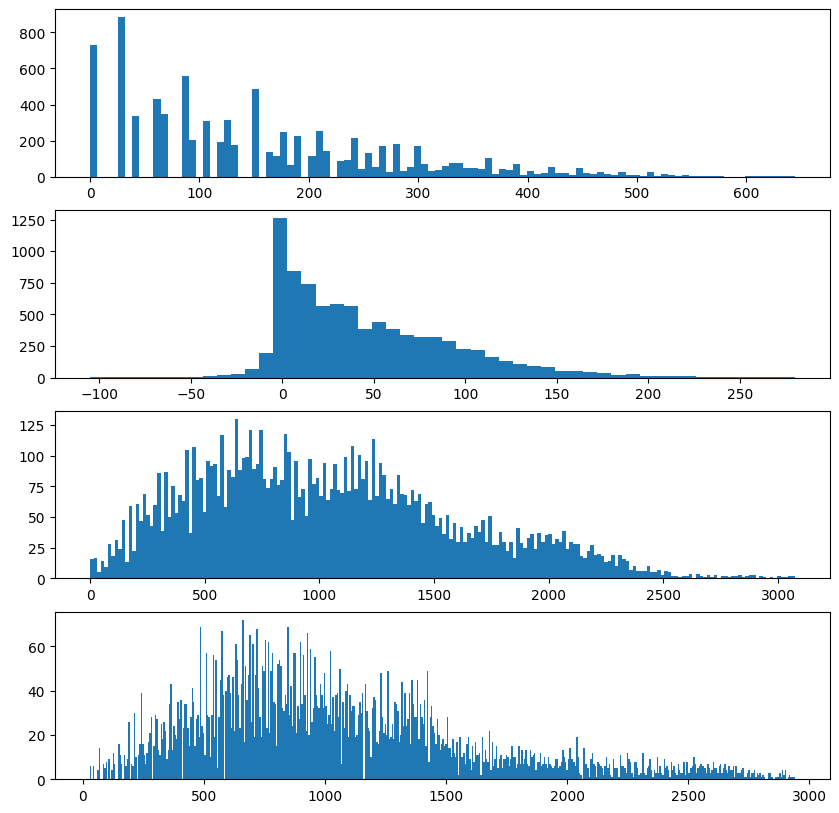

In [17]:
cover_type6 = df[df['Cover_Type'] == 6]
print(cover_type6)
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
axes[0].hist(cover_type6["Horizontal_Distance_To_Hydrology"],bins=100)# 最も近い水面までの水平距離
axes[1].hist(cover_type6["Vertical_Distance_To_Hydrology"],bins=50)# 最も近い水面までの垂直距離
axes[2].hist(cover_type6["Horizontal_Distance_To_Roadways"],bins=200)# 最も近い道路までの水平距離
axes[3].hist(cover_type6["Horizontal_Distance_To_Fire_Points"],bins=500)# 最も近い森林火災点までの距離
plt.show()

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
3            3221     168     16                                30   
62           3415     347      9                               641   
111          3302     344     12                               960   
335          3294       9      5                                30   
353          3319     195     11                                 0   
...           ...     ...    ...                               ...   
580664       3262     337     14                                30   
580826       3421     301     15                               175   
580872       3251      95     13                               492   
580878       3282     342     14                               551   
580982       3142       0      5                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
3                                   11                             2577   
62       

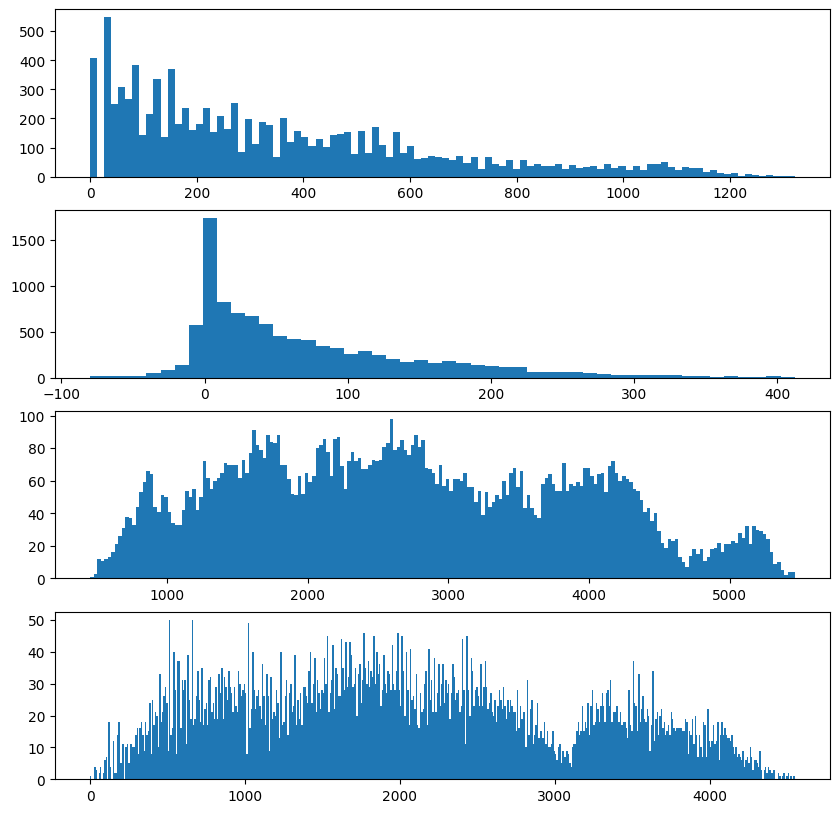

In [18]:
cover_type7 = df[df['Cover_Type'] == 7]
print(cover_type7)
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
axes[0].hist(cover_type7["Horizontal_Distance_To_Hydrology"],bins=100)# 最も近い水面までの水平距離
axes[1].hist(cover_type7["Vertical_Distance_To_Hydrology"],bins=50)# 最も近い水面までの垂直距離
axes[2].hist(cover_type7["Horizontal_Distance_To_Roadways"],bins=200)# 最も近い道路までの水平距離
axes[3].hist(cover_type7["Horizontal_Distance_To_Fire_Points"],bins=500)# 最も近い森林火災点までの距離
plt.show()